In [160]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import json
import numpy as np

## Read data
### Bag of Words


#### Original code

In [161]:
# X = None
# y = None
# start = True
# size = 5000

# count = 0

# with open("../../data/domain1_train.json") as f:
#     for line in f:
#         # read line by line
#         data = json.loads(line)
        
#         # Bag of Words
#         new_line = np.zeros((1, size))
#         for i in data["text"]:
#             new_line[0][i] = new_line[0][i] + 1

#         if start:
#             X = np.array(new_line)
#             y = np.array(data["label"])
#             start = False
#         else:
#             X = np.append(X, new_line, axis=0)
#             y = np.append(y, data["label"])

#         count = count + 1
#         if count == 100:
#             break


#### Faster version

In [162]:
text = []
label = []

with open("../../data/domain1_train.json") as f:
    for line in f:
        # read line by line
        data = json.loads(line)
        
        # add values
        text.append(data["text"])
        label.append(data["label"])


#### Length of data

In [163]:
len(X)

14900

#### Create dummy data for making vertor space

In [164]:
vector_sample = np.arange(5000)

#### Vectorize the data

In [165]:
from sklearn.feature_extraction.text import CountVectorizer

def toStr(n):
   return str(n)

# Create a Vectorizer Object
vectorizer = CountVectorizer(preprocessor= toStr, analyzer="word", token_pattern=r"(?u)\b\w+\b")

vectorizer.fit(vector_sample)

# Printing the identified Unique words along with their indices
print("Vocabulary: ", vectorizer.vocabulary_)

# Encode the Document
vector = vectorizer.transform(text)

# Summarizing the Encoded Texts
print("Encoded Document is:")
print(vector.toarray())


Vocabulary:  {'0': 0, '1': 1, '2': 1112, '3': 2223, '4': 3334, '5': 4445, '6': 4556, '7': 4667, '8': 4778, '9': 4889, '10': 2, '11': 113, '12': 224, '13': 335, '14': 446, '15': 557, '16': 668, '17': 779, '18': 890, '19': 1001, '20': 1113, '21': 1224, '22': 1335, '23': 1446, '24': 1557, '25': 1668, '26': 1779, '27': 1890, '28': 2001, '29': 2112, '30': 2224, '31': 2335, '32': 2446, '33': 2557, '34': 2668, '35': 2779, '36': 2890, '37': 3001, '38': 3112, '39': 3223, '40': 3335, '41': 3446, '42': 3557, '43': 3668, '44': 3779, '45': 3890, '46': 4001, '47': 4112, '48': 4223, '49': 4334, '50': 4446, '51': 4457, '52': 4468, '53': 4479, '54': 4490, '55': 4501, '56': 4512, '57': 4523, '58': 4534, '59': 4545, '60': 4557, '61': 4568, '62': 4579, '63': 4590, '64': 4601, '65': 4612, '66': 4623, '67': 4634, '68': 4645, '69': 4656, '70': 4668, '71': 4679, '72': 4690, '73': 4701, '74': 4712, '75': 4723, '76': 4734, '77': 4745, '78': 4756, '79': 4767, '80': 4779, '81': 4790, '82': 4801, '83': 4812, '84':

#### Length of columns

In [166]:
len(vectorizer.vocabulary_)

5000

#### Columns names

In [167]:
vectorizer.get_feature_names_out()

array(['0', '1', '10', ..., '997', '998', '999'], dtype=object)

#### Transform dataset for Random Forest model

In [168]:
X = vector.toarray()
y = np.array(label).ravel()

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (19500, 5000)
Shape of y: (19500,)


In [169]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X, y)

RandomForestClassifier(max_depth=2, random_state=0)

In [170]:
print(clf.predict([X[2]]), y[2])

[1] 1


In [171]:
from sklearn.model_selection import cross_val_score

scores = []
n = 10
for i in range(2, 6, 1):
    clf = RandomForestClassifier(max_depth=i, random_state=0)
    score = sum(cross_val_score(clf, X, y, cv=n)) / n
    scores.append(score)

print(scores)

[0.848974358974359, 0.8622051282051283, 0.8725641025641027, 0.8761538461538463]


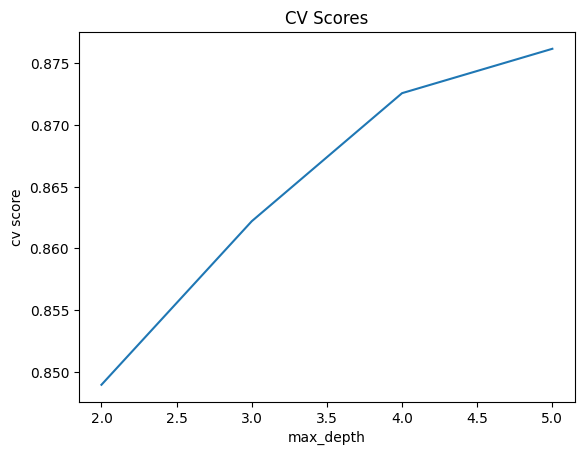

In [172]:
import matplotlib.pyplot as plt

# plotting the points 
plt.plot(range(2, 6, 1), scores)
  
# naming the x axis
plt.xlabel('max_depth')
# naming the y axis
plt.ylabel('cv score')
  
# giving a title to my graph
plt.title('CV Scores')
  
# function to show the plot
plt.show()

#### Test for domain 2 data

In [173]:
text = []
label = []

with open("../../data/domain2_train.json") as f:
    for line in f:
        # read line by line
        data = json.loads(line)
        
        # add values
        text.append(data["text"])
        label.append(data["label"])

In [174]:
# Encode the Document
vector = vectorizer.transform(text)

# Summarizing the Encoded Texts
print("Encoded Document is:")
print(vector.toarray())

Encoded Document is:
[[ 3  5  1 ...  0  0  0]
 [ 4  4  2 ...  0  0  0]
 [84 25  5 ...  0  0  0]
 ...
 [ 3  5  2 ...  3  0  0]
 [ 0  5  3 ...  0  0  0]
 [ 2  5  4 ...  0  0  0]]


In [175]:
X = vector.toarray()
y = np.array(label).ravel()

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (14900, 5000)
Shape of y: (14900,)


#### Skip the training step
- So the model have not learnt the domain 2 data
- Hoe the model predict unseen data(domain 2)?

In [176]:
# clf = RandomForestClassifier(max_depth=2, random_state=0)
# clf.fit(X, y)

In [177]:
from sklearn.model_selection import cross_val_score

scores = []
n = 10
for i in range(2, 6, 1):
    clf = RandomForestClassifier(max_depth=i, random_state=0)
    score = sum(cross_val_score(clf, X, y, cv=n)) / n
    scores.append(score)

print(scores)

[0.8557046979865772, 0.8557046979865772, 0.8557046979865772, 0.8557046979865772]


#### Now predict the test data

In [190]:
from sklearn.model_selection import cross_val_score

text = []
label = []

with open("../../data/domain1_train.json") as f:
    for line in f:
        # read line by line
        data = json.loads(line)
        
        # add values
        text.append(data["text"])
        label.append(data["label"])

with open("../../data/domain2_train.json") as f:
    for line in f:
        # read line by line
        data = json.loads(line)
        
        # add values
        text.append(data["text"])
        label.append(data["label"])

# Encode the Document
vector = vectorizer.transform(text)

# Summarizing the Encoded Texts
print("Encoded Document is:")
print(vector.toarray())

X = vector.toarray()
y = np.array(label).ravel()

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X, y)

sum(cross_val_score(clf, X, y, cv=10)) / 10

# scores = []
# n = 10
# for i in range(2, 6, 1):
#     clf = RandomForestClassifier(max_depth=i, random_state=0)
#     score = sum(cross_val_score(clf, X, y, cv=n)) / n
#     scores.append(score)

# print(scores)

Encoded Document is:
[[7 0 0 ... 0 0 0]
 [1 1 0 ... 0 0 0]
 [6 1 0 ... 0 0 0]
 ...
 [3 5 2 ... 3 0 0]
 [0 5 3 ... 0 0 0]
 [2 5 4 ... 0 0 0]]
Shape of X: (34400, 5000)
Shape of y: (34400,)


0.6540697674418606

In [191]:
text = []

with open("../../data/test_set.json") as f:
    for line in f:
        # read line by line
        data = json.loads(line)
        
        # add values
        text.append(data["text"])

In [192]:
# Encode the Document
vector = vectorizer.transform(text)

# Summarizing the Encoded Texts
print("Encoded Document is:")
print(vector.toarray())

X = vector.toarray()

print("Shape of X:", X.shape)

Encoded Document is:
[[32 14  3 ...  0  0  0]
 [ 2 11  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 7  1  0 ...  0  0  0]
 [27 18  6 ...  0  0  0]]
Shape of X: (1000, 5000)


In [200]:
import pandas as pd

y = clf.predict(X)
print(y)

result = pd.DataFrame({"class":y}).reset_index().rename(columns = {'index':'id'})
result.to_csv("./result_RF.csv", index=False)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

## Feedback
### - Accuracy is good and the length is fixed to 5000.
### - Can well fit to fluctuating text lengths
### - Bag of words works well !!!